### One-sample proportion z-test

In [65]:
coasters.head()

,Name,Park,Track,Speed,Height,Drop,Length,Duration,Inversions
0,Top Thrill Dragster,Cedar Point,Steel,120.0,420.0,400.0,2800.0,NaN,0
1,Superman The Escap,Six Flags Magic Mountain,Steel,100.0,415.0,328.1,1235.0,NaN,0
2,Millennium Force,Cedar Point,Steel,93.0,310.0,300.0,6595.0,165.0,0
3,Goliath,Six Flags Magic Mountain,Steel,85.0,235.0,255.0,4500.0,180.0,0
4,Titan,Six Flags Over Texas,Steel,85.0,245.0,255.0,5312.0,210.0,0


In [68]:
coasters["Track"].value_counts()

Steel    212
Wood      29
Name: Track, dtype: int64

In [83]:
n_coasters = 212 + 29
steel_p = 212 / n_coasters

In [85]:
print("The proportion of steel coasters in 2015 is equal to: ", steel_p)

The proportion of steel coasters in 2015 is equal to:  0.8796680497925311


A roller-coasters' expert suggests that during 2022 the proportion of steel coasters has changed. His studies shows that 320 out of 355 coasters are made of steel.

* h0 : p = steel_p -> the proportion of steel coasters in 2022 is 0.88
* ha : p ≠ steel_p -> the proportion of steel coasters in 2022 is different from 0.88

**Arguments**
* count = # ; number of successes if Null Hypothesis is True. (P * nobs)
* nobs = # ; number of trials or size of sample.
* value = # ; Observed Proportion
* alternative = "nameOfAlternative" ; Type of test(2-tailed or 1-tailed)

In [104]:
suc = 0.88 * 355
sample_size = 355
obs_prop = 320/355

In [109]:
z_test , p_value = sm.proportions_ztest(count = 312 , nobs = 355, value = 0.9, alternative = "two-sided")
print("The z test values is: ", z_test, ". The p-value is: ", p_value)

The z test values is:  -1.220011473889561 . The p-value is:  0.22246052533158622


Since the p-value is greater than 0.05 we fail to reject the null hypothesis. We do not have enough evidence to say that the proportion of steel rollercoasters in 2022 has changed sinced 2015.

### Confidence Interval for proportions

In [111]:
conf_prop = sm.proportion_confint(212, 241, alpha = 0.05)
print(conf_prop)

(0.8385919257601463, 0.9207441738249159)


We are 95% confident that between 83% and 92% of the roller coasters in the world are made out of steel.

### Confidence Interval for means

In [134]:
sd_speed = coasters["Speed"].std()
print(se_speed)

18.664831279556996


In [135]:
se_speed = sd_speed/math.sqrt(241)
print(se_speed)

1.2023074749380138


In [138]:
t_speed = st.t.interval(alpha = 0.95, df = 240, loc = mean_speed, scale = sd_speed)
print("The t-interval is: ", t_speed)

The t-interval is:  (18.582815409951472, 92.11842940332659)


We are 95% confident that the average speed of rollercoasters in the world will be between 18 and 92 m/h

## Inference for Linear Regression using statsmodels.api
Checking conditions and assumptions for linear regression inference

### Linearity

In [147]:
coasters.head()

,Name,Park,Track,Speed,Height,Drop,Length,Duration,Inversions
0,Top Thrill Dragster,Cedar Point,Steel,120.0,420.0,400.0,2800.0,NaN,0
1,Superman The Escap,Six Flags Magic Mountain,Steel,100.0,415.0,328.1,1235.0,NaN,0
2,Millennium Force,Cedar Point,Steel,93.0,310.0,300.0,6595.0,165.0,0
3,Goliath,Six Flags Magic Mountain,Steel,85.0,235.0,255.0,4500.0,180.0,0
4,Titan,Six Flags Over Texas,Steel,85.0,245.0,255.0,5312.0,210.0,0


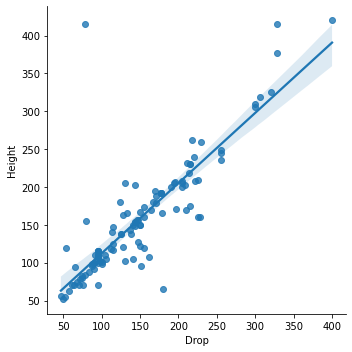

In [153]:
import seaborn as sns
sns.lmplot(data = coasters, x = "Drop", y = "Height")

### Independence and Equal Variance

<AxesSubplot:xlabel='Drop', ylabel='Height'>

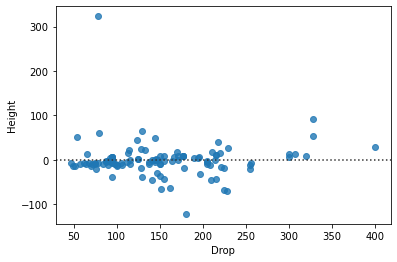

In [154]:
sns.residplot(data = coasters, x = "Drop", y = "Height")

### Normal Population

In [207]:
import statsmodels.api as sma
x = coasters["Height"]
y = coasters["Drop"]
x = sma.add_constant(x)

In [208]:
x.head()

,const,Height
0,1.0,420.0
1,1.0,415.0
2,1.0,310.0
3,1.0,235.0
4,1.0,245.0


In [214]:
model = sma.OLS(y, x, missing = "drop")
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Drop   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     294.2
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           1.32e-33
Time:                        14:54:48   Log-Likelihood:                -592.26
No. Observations:                 118   AIC:                             1189.
Df Residuals:                     116   BIC:                             1194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.9494      7.865      3.426      0.001      11.372      42.527
Height         0.7730      0.045     17.153      0.000       0.684       0.862
==============================================================================
Omnibus:                      114.850   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2867.218
Skew:                          -3.004   Prob(JB):                         0.00
Kurtosis:                      26.390   Cond. No.                         404.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:ylabel='Count'>

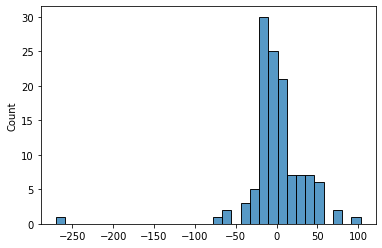

In [185]:
sns.histplot(model_result.resid)

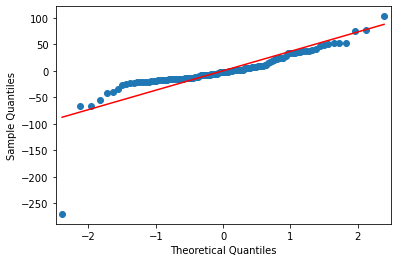

In [186]:
sma.qqplot(model_result.resid, line='s');

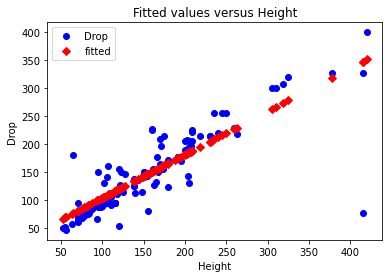

In [187]:
sma.graphics.plot_fit(model_result,1, vlines=False);

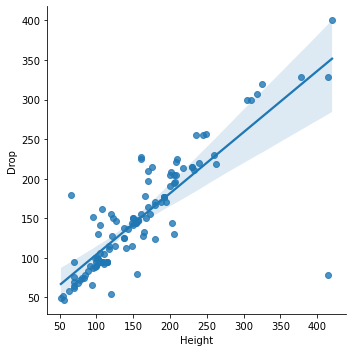

In [218]:
sns.lmplot(data = coasters, x = "Height", y = "Drop")

## References
* https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/09_regression.html

Is there an association between Drop and Height after adjusting for relevant confounders?

In [217]:
import statsmodels.formula.api as smf
model1 = smf.ols(data = coasters, formula = "Drop ~ Height").fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Drop   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     294.2
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           1.32e-33
Time:                        14:55:39   Log-Likelihood:                -592.26
No. Observations:                 118   AIC:                             1189.
Df Residuals:                     116   BIC:                             1194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.9494      7.865      3.426      0.0